<a href="https://colab.research.google.com/github/ZainabSyed88/Machine-Learning/blob/main/Kidney_Disease_EDA_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the DataSet**

The dataset comprises of patient records with various medical attributes, including numerical features such as age, blood pressure, and blood glucose levels, as well as categorical features like red blood cell presence and hypertension status. The target variable, 'classification', denotes the presence or absence of chronic kidney disease (ckd). Missing values are present in some features, requiring data cleaning, while further exploration through exploratory data analysis (EDA) and potentially predictive modeling can unveil insights into factors associated with ckd.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Preparation**

In [4]:
train=pd.read_csv('/content/kidney_disease.csv')

In [5]:
train.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
train.shape

(400, 26)

In [7]:
train.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

:**Renaming the column names**

In [8]:
col={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

train.rename(columns=col, inplace=True)
# test.rename(columns=col, inplace=True)

In [9]:
print('We have total {} train sample'.format(train.shape[0]))

We have total 400 train sample


In [10]:
#drop id column
train.drop(["id"],axis=1,inplace=True)

**Removing the "id" column as it typically acts as a unique identifier for each record but doesn't usually provide any useful information for analysis or modeling.**

# **EDA(Explorartory Data Analysis)**

**There are null values in almost every column. Age column has 391 non null values, which means 9 values are null here.**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [12]:
train.isnull().sum() #checking sum of null values

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [13]:
# Percentage of missing values
((train.isnull().sum()/train.shape[0])*100).sort_values(ascending=False)

red_blood_cells            38.00
red_blood_cell_count       32.50
white_blood_cell_count     26.25
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.50
pus_cell                   16.25
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood_pressure              3.00
age                         2.25
bacteria                    1.00
pus_cell_clumps             1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
classification              0.00
dtype: float64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

Below we have converted columns , 'red_blood_cell_count' and 'white_blood_cell_count' as a float.

The errors='coerce' parameter instructs pandas to convert any values that cannot be converted to numeric types into NaN (Not a Number) values.

In [15]:
train['red_blood_cell_count'] = pd.to_numeric(train['red_blood_cell_count'], errors='coerce')
train['white_blood_cell_count'] = pd.to_numeric(train['white_blood_cell_count'], errors='coerce')

**train.describe(include='all').T :**- computes summary statistics for each column (feature) in the DataFrame train, including both numerical and categorical columns. Here's what each part of the code does.

**.T** :- This method transposes the summary statistics DataFrame, swapping rows and columns. In this context, it flips the DataFrame so that the features (columns) become rows, and the summary statistics become columns, making it easier to read.

In [16]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,51.483376,17.169714,2.0,42.0,55.0,64.5,90.0
blood_pressure,388.0,NaN,NaN,NaN,76.469072,13.683637,50.0,70.0,80.0,80.0,180.0
specific_gravity,353.0,NaN,NaN,NaN,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,NaN,NaN,NaN,1.016949,1.352679,0.0,0.0,0.0,2.0,5.0
sugar,351.0,NaN,NaN,NaN,0.450142,1.099191,0.0,0.0,0.0,0.0,5.0
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose_random,356.0,NaN,NaN,NaN,148.036517,79.281714,22.0,99.0,121.0,163.0,490.0


**The below line of code iterates through each column in the DataFrame train and prints out the unique values present in each column.**

In [17]:
for i in train.columns:
    print('{} has unique values {}'.format(i,train[i].unique()),'\n')

age has unique values [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

blood_pressure has unique values [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

specific_gravity has unique values [1.02  1.01  1.005 1.015   nan 1.025] 

albumin has unique values [ 1.  4.  2.  3.  0. nan  5.] 

sugar has unique values [ 0.  3.  4.  1. nan  2.  5.] 

red_blood_cells has unique values [nan 'normal' 'abnormal'] 

pus_cell has unique values ['normal' 'abnormal' nan] 

pus_cell_clumps has unique values ['notpresent' 'present' nan] 

bacteria has unique values ['notpresent' 'present' nan] 

blood_glucose_random has unique values [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173. 

**Observation:**

There are multiple incorrect values present in the columns diabetes_mellitus and coronary_artery_disease like \tyes and \tno.

Let’s replace those values with correct values

In [18]:
#Replace incorrect values
train['packed_cell_volume'] = train['packed_cell_volume'].replace(to_replace = {'\t?': np.nan,'\t43':'43'})
train['diabetes_mellitus'] = train['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
train['coronary_artery_disease'] = train['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
train['classification'] = train['classification'].replace(to_replace = 'ckd\t', value = 'ckd')
train['packed_cell_volume'] = pd.to_numeric(train['packed_cell_volume'], errors='coerce')

**The below countplot shows the distribution of samples across the two classes: 'ckd' (chronic kidney disease) and 'notckd' (not a chronic kidney disease). This helps us understand the imbalance or balance between the two classes in the dataset.**

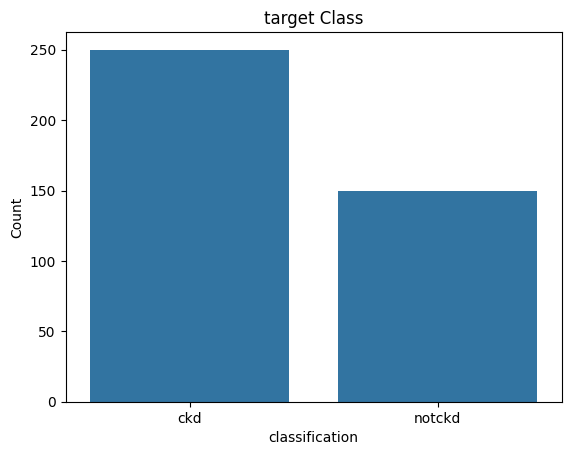

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [19]:
sns.countplot(x='classification',data=train)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(train[train['classification']=='ckd'])/len(train['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(train[train['classification']=='notckd'])/len(train['classification'])*100,2),"%")

# **Correlation**

<ipython-input-20-cefc1ce833db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = train.corr()


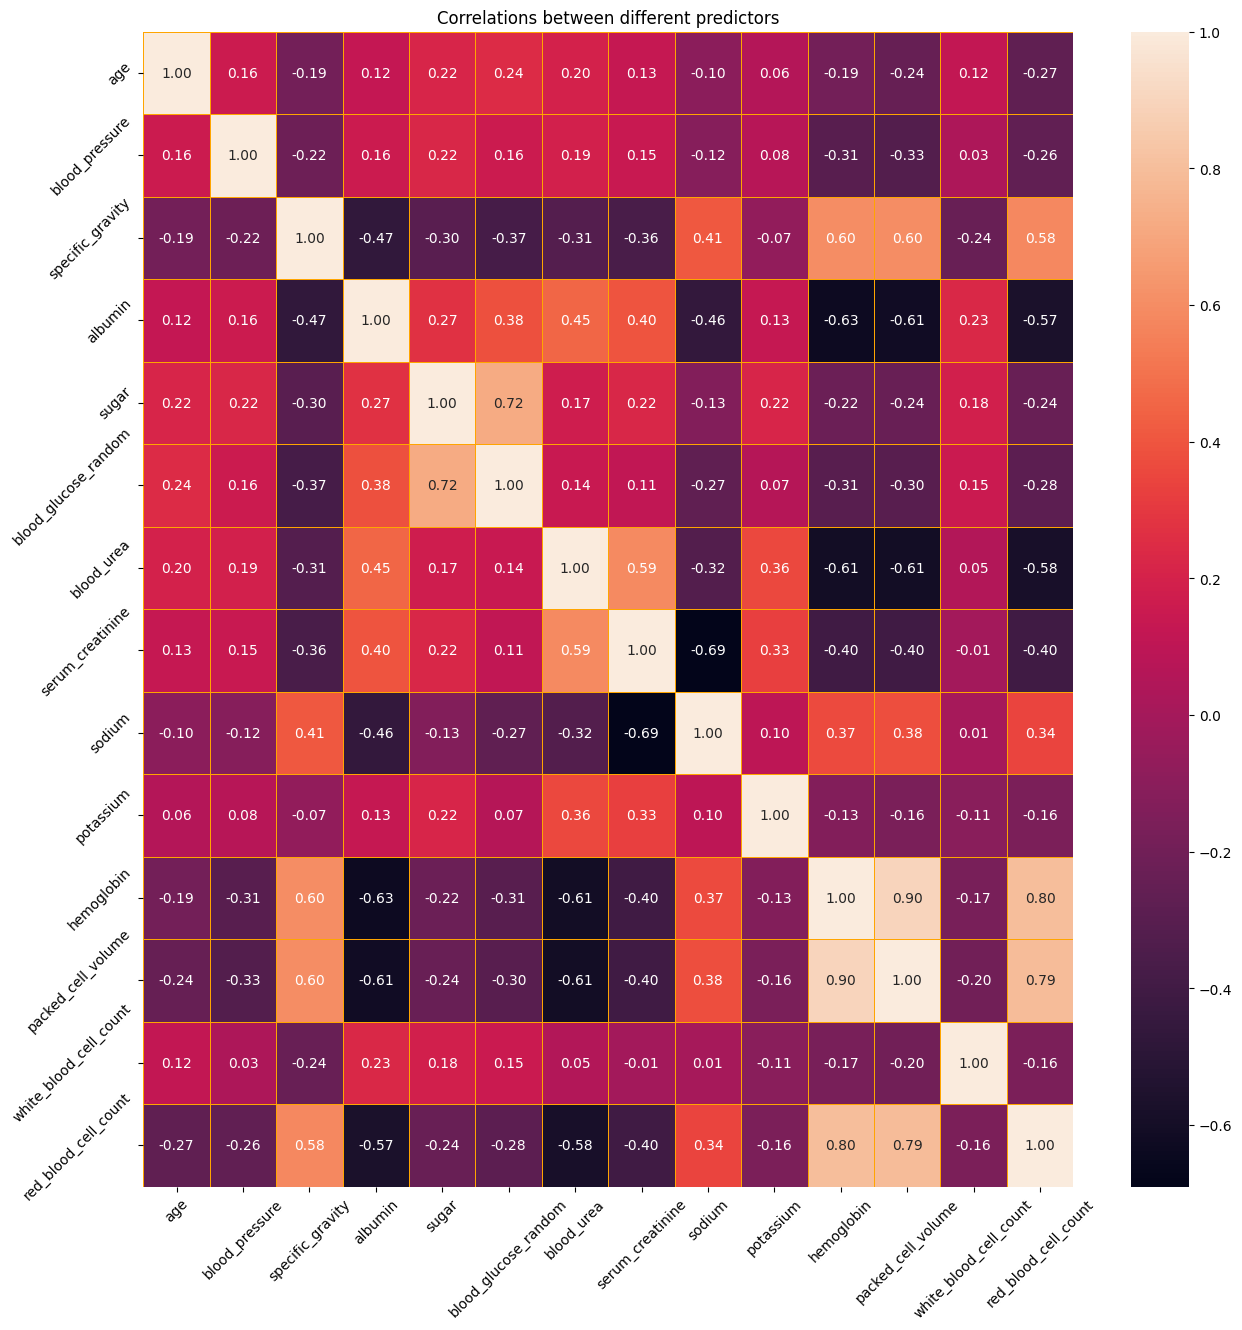

In [20]:
corr_df = train.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

**Positive Correlation**
* hemoglobin -> red_blood_cell_count,packed_cell_volume, specific_gravity
* red_blood_cell_count -> packed_cell_volume,specific_gravity
* specific_gravity -> packed_cell_volume
* blood_glucose_random -> sugar
* serum_creatinine -> blood_urea

**Negative correlation**
* Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count
* serum_creatinine -> sodium
* blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count

**How do these correlations relate to known risk factors or indicators of chronic kidney disease?**
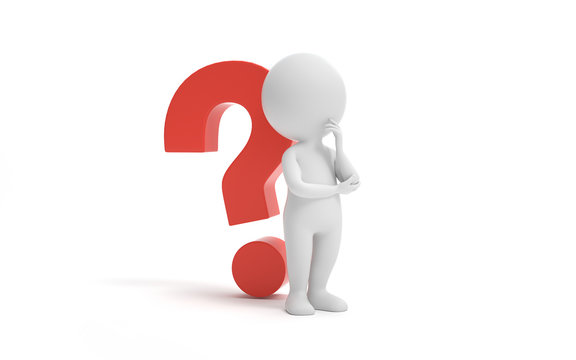

* We observed positive correlations between hemoglobin and red blood cell count, and between serum creatinine and blood urea. This suggests that as one of these markers increases, the other tends to increase too. In CKD, elevated levels of serum creatinine and blood urea are common, indicating kidney dysfunction. Similarly, low levels of hemoglobin and red blood cell count may indicate anemia, which is also associated with CKD.

* We found a negative correlation between albumin and serum creatinine levels. This suggests that as serum creatinine levels increase (indicating kidney dysfunction), albumin levels tend to decrease (which may indicate protein loss in urine, a sign of kidney damage). Additionally, the negative correlation between serum creatinine and sodium levels could indicate electrolyte imbalances often seen in CKD patients.

# **Visualizing numeric features**

**Key Insights on each Distribution:-**

* **Age Distribution:** The distribution of age appears to be somewhat bimodal, indicating that there may be distinct age groups present in the dataset.
* **Blood Pressure:**The distribution of blood pressure shows multiple peaks, suggesting that there may be different subgroups of individuals with varying blood pressure levels. This could be indicative of hypertension, a known risk factor for kidney disease.
* **Specific Gravity:** The distribution of specific gravity appears to be relatively symmetrical, centered around a particular value. Deviations from this central tendency could be indicative of abnormal kidney function.
* **Albumin, Sugar, and Blood Glucose:** These features exhibit skewed distributions with a long tail to the right. Higher values of albumin, sugar, and blood glucose may indicate abnormalities that could be associated with kidney disease
* **Blood Urea and Serum Creatinine:** Both blood urea and serum creatinine show right-skewed distributions, suggesting that higher values are more common. Elevated levels of these markers are often indicative of impaired kidney function.
* **Electrolyte Levels (Sodium and Potassium):** The distributions of sodium and potassium appear to be relatively symmetrical. Abnormal levels of these electrolytes could be associated with kidney dysfunction.
* **Hemoglobin:** The distribution of hemoglobin appears to be approximately normal, centered around a specific value. Deviations from this central tendency could indicate anemia, which is common in individuals with kidney disease.

total numerical column : 11
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin']


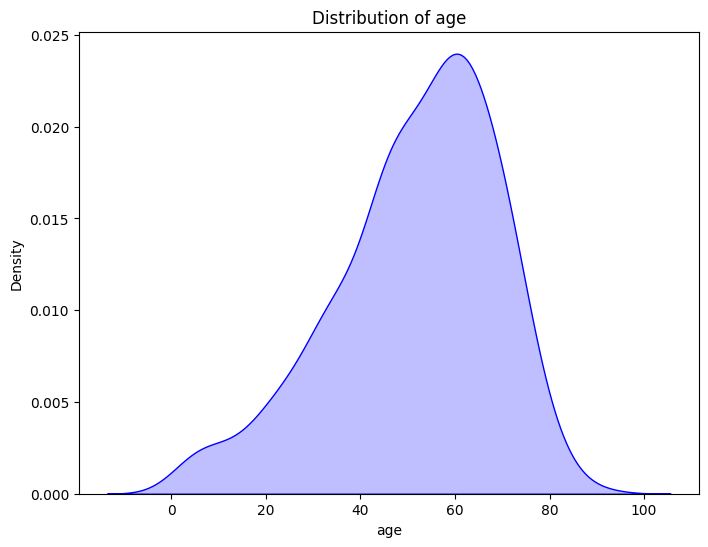

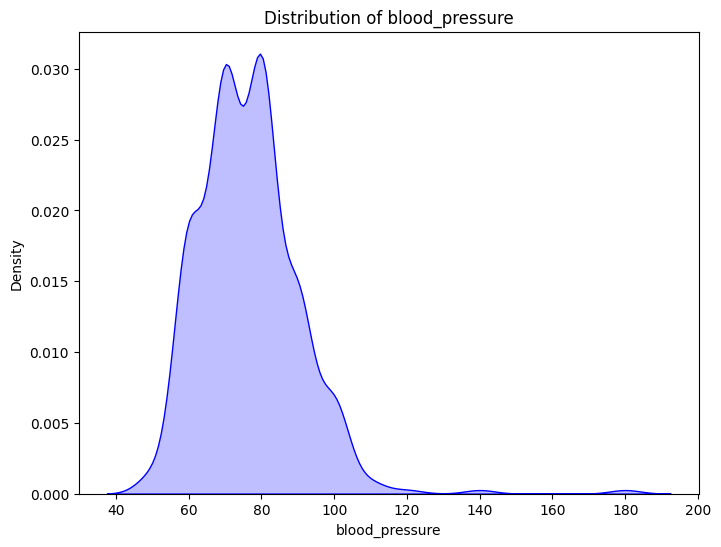

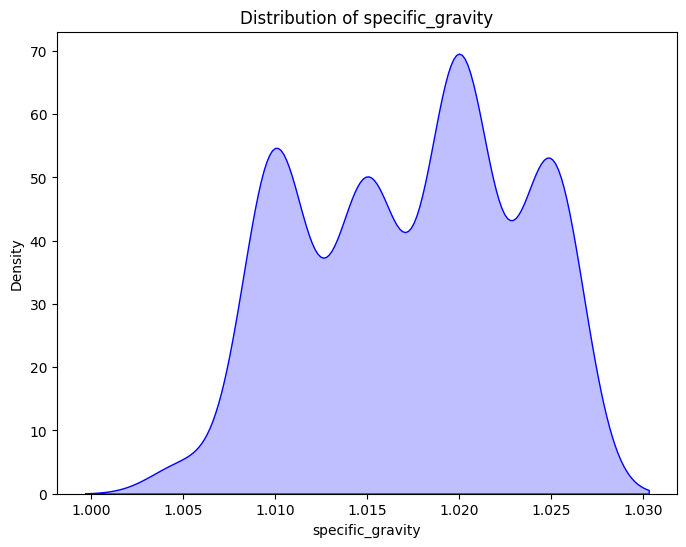

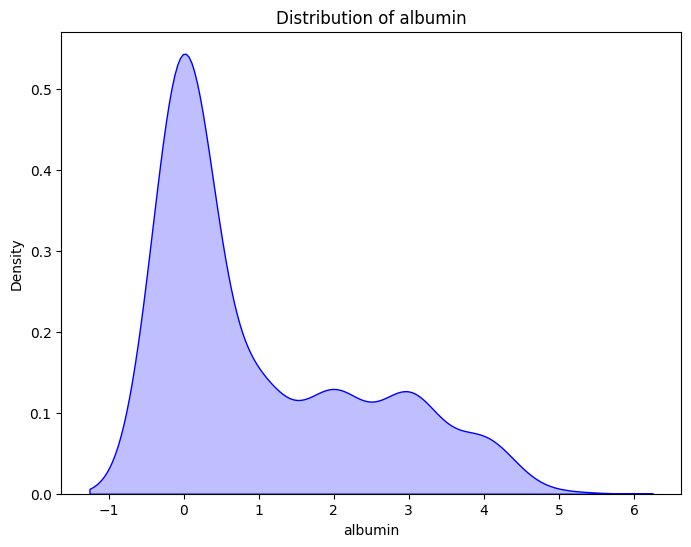

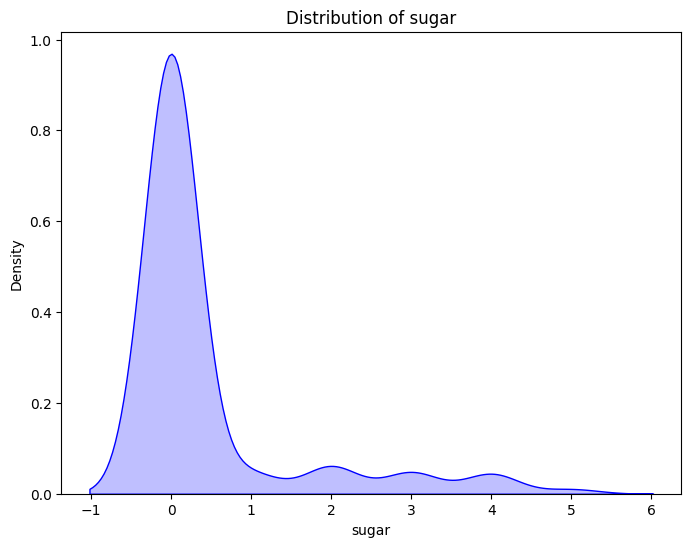

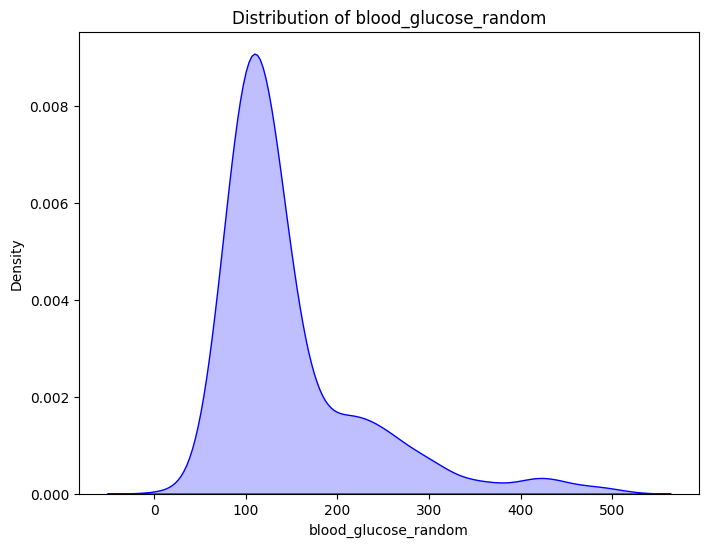

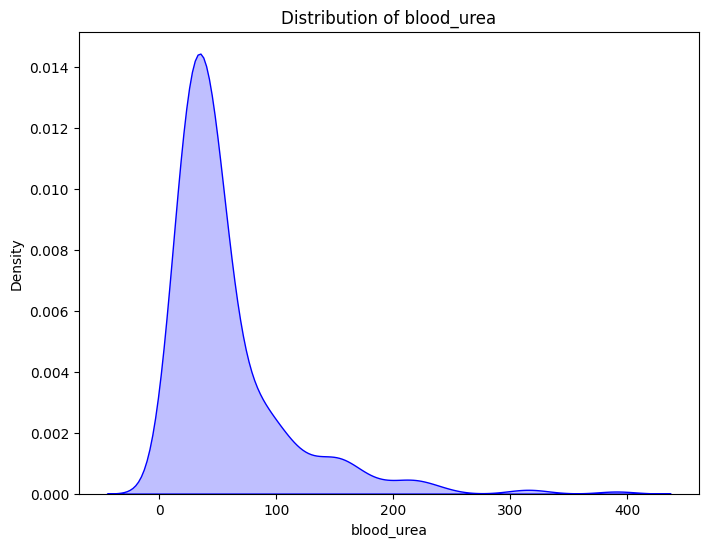

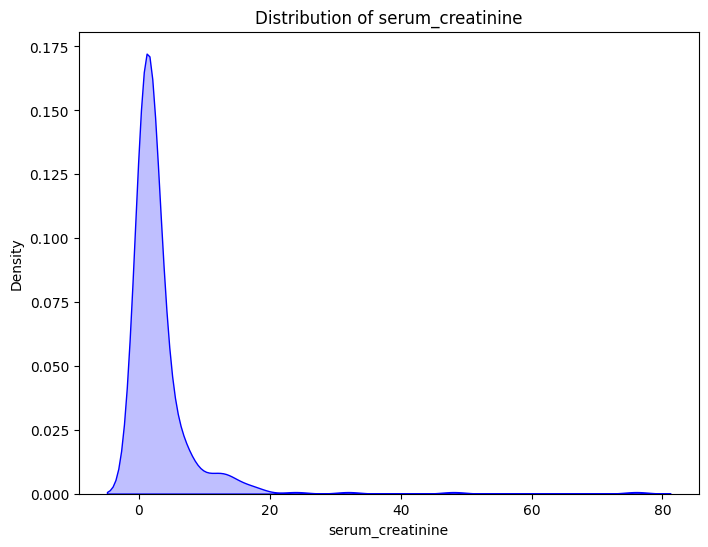

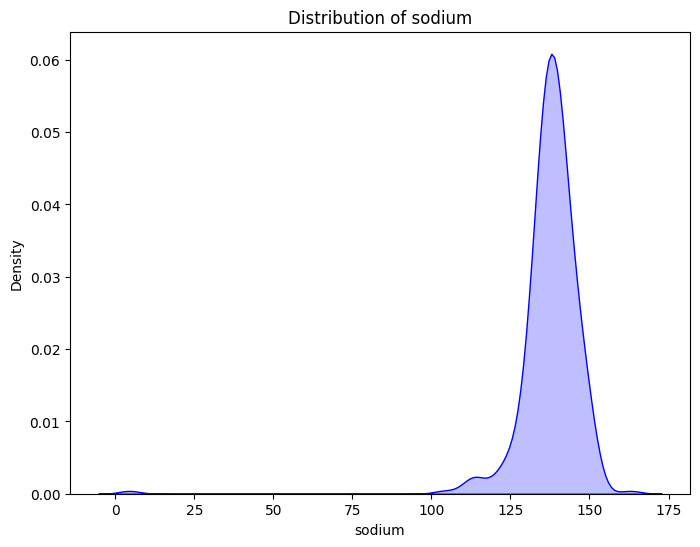

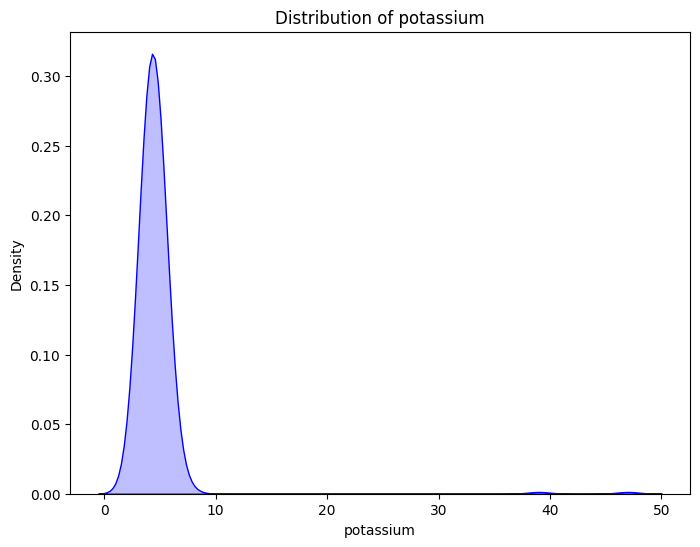

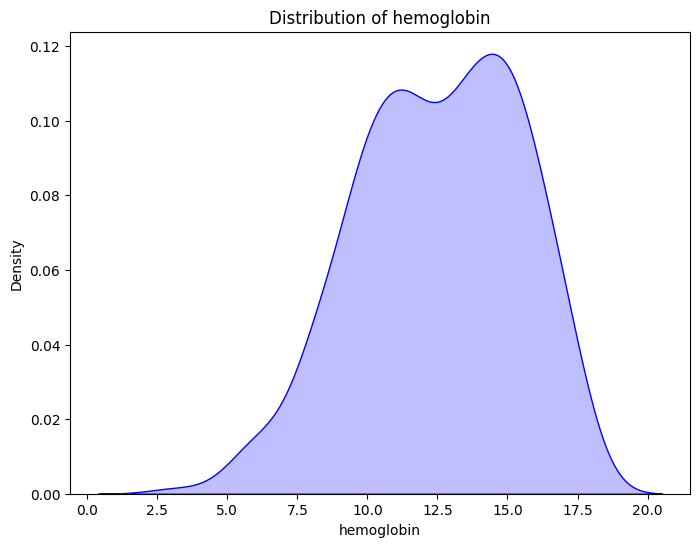

In [21]:
numeric_features = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random',
                    'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin']
print('total numerical column :',len(numeric_features))
print(numeric_features)

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=train, x=feature, color='blue', fill=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

**Key Insights on each distributions:-**

**Red Blood Cells:** Abnormal red blood cell counts are prevalent among patients, indicating potential hematological abnormalities.

**Pus Cell:** Abnormal pus cell presence suggests a notable incidence of urinary tract infections among patients.

**Pus Cell Clumps:** The presence of pus cell clumps indicates severe or persistent urinary tract infections in some cases.

**Bacteria:**Bacterial presence in urine highlights a significant incidence of bacterial infections in the urinary tract.

**Hypertension:** High blood pressure is common among patients, emphasizing its role as a comorbidity in chronic kidney disease.

**Diabetes Mellitus:** Diabetes prevalence underscores its significant association with chronic kidney disease.

**Coronary Artery Disease:**Presence of coronary artery disease suggests a notable incidence of cardiovascular comorbidities among patients.

**Appetite:**Poor appetite prevalence indicates potential nutritional challenges or underlying health issues among patients.

**Pedal Edema:**  Presence of pedal edema signifies fluid retention, a common complication in kidney disease.

**Anemia:** Anemia prevalence highlights the frequent occurrence of low red blood cell counts among patients, contributing to symptoms like fatigue.

In [22]:
#summary statistics on numerical features
train[numeric_features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [23]:
((train[numeric_features].isnull().sum()/train.shape[0])*100).sort_values(ascending=False)

potassium               22.00
sodium                  21.75
hemoglobin              13.00
sugar                   12.25
specific_gravity        11.75
albumin                 11.50
blood_glucose_random    11.00
blood_urea               4.75
serum_creatinine         4.25
blood_pressure           3.00
age                      2.25
dtype: float64

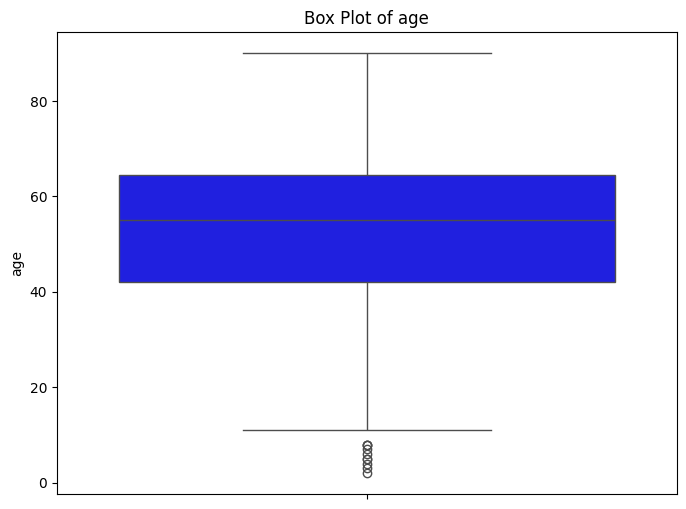

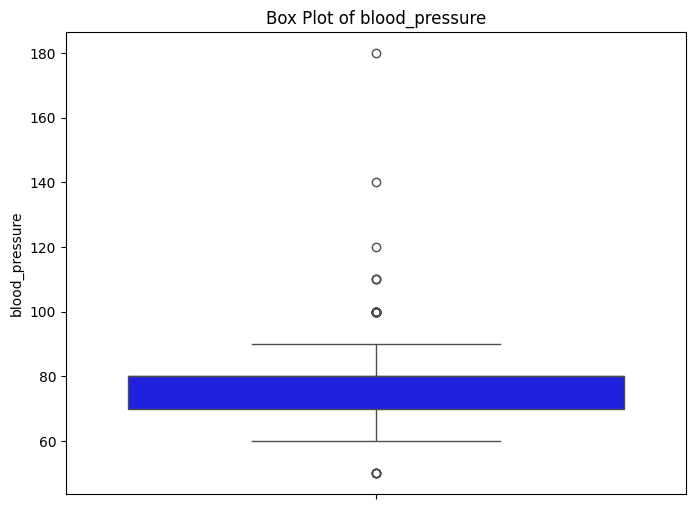

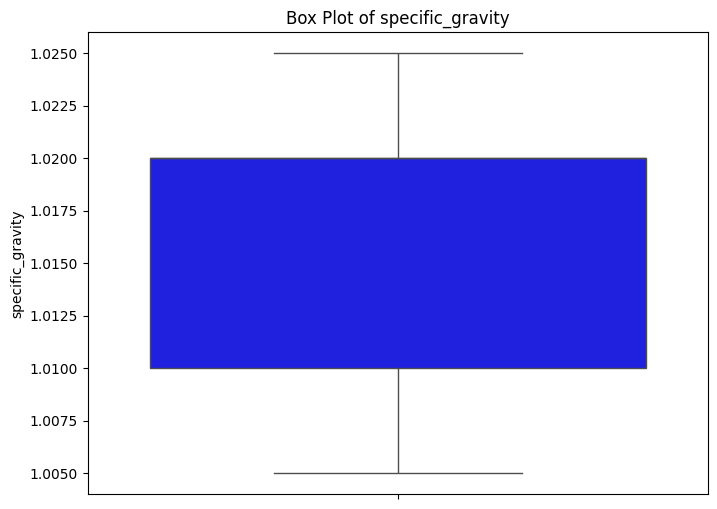

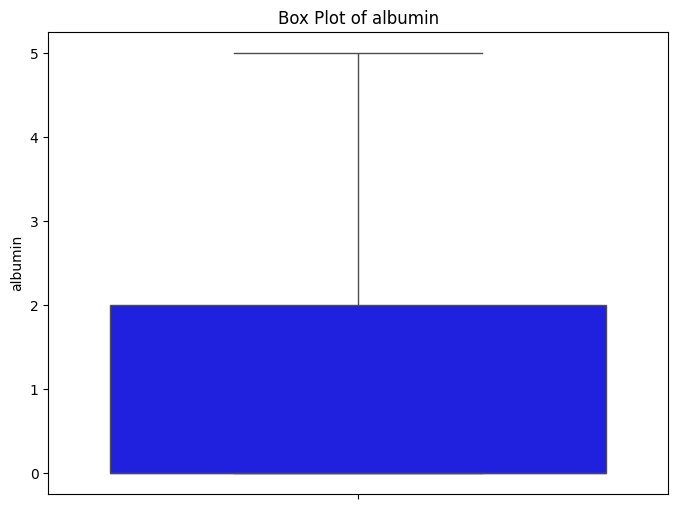

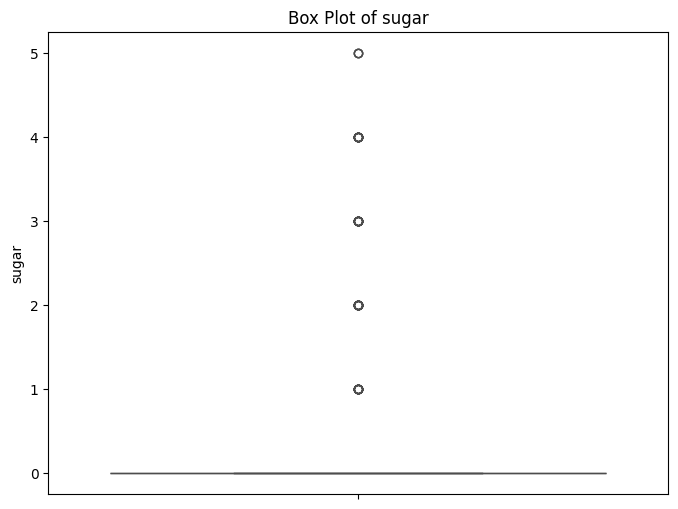

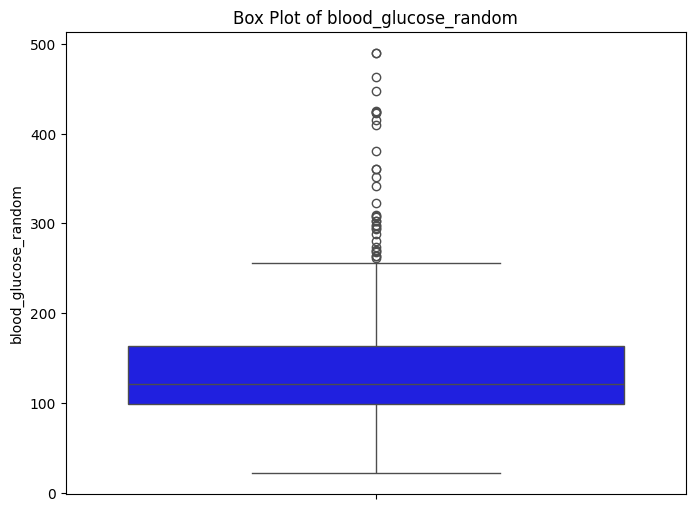

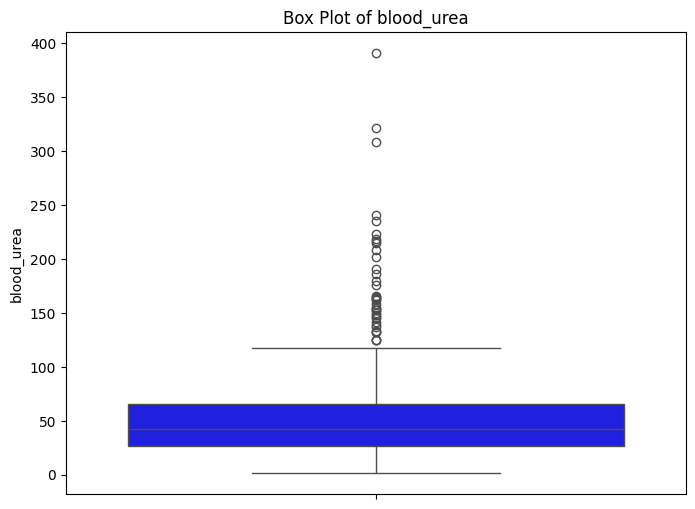

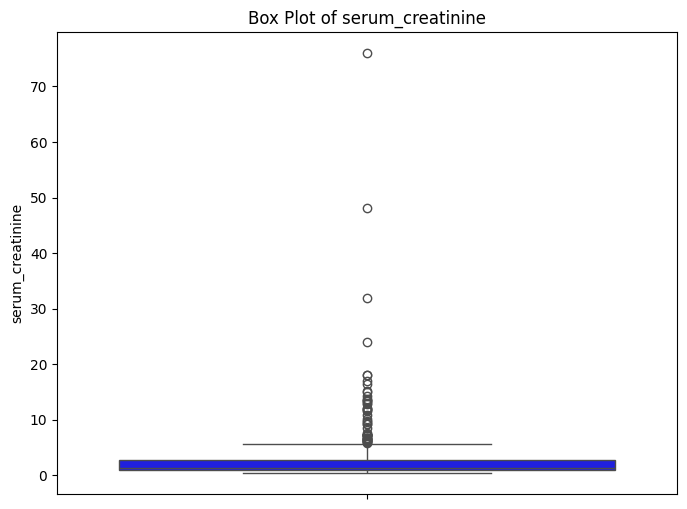

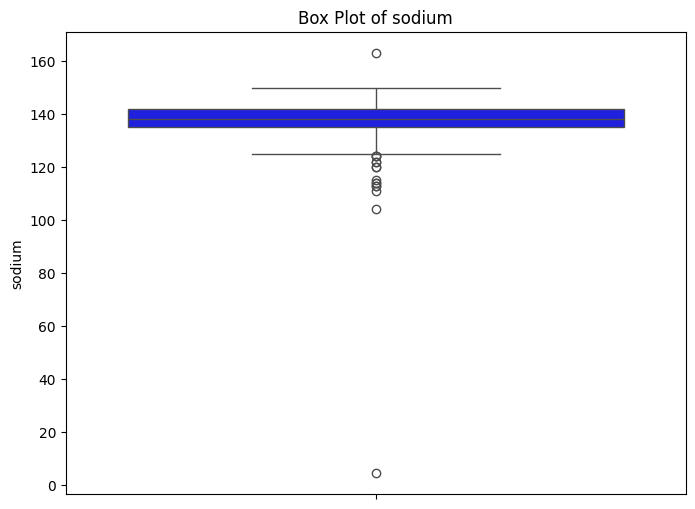

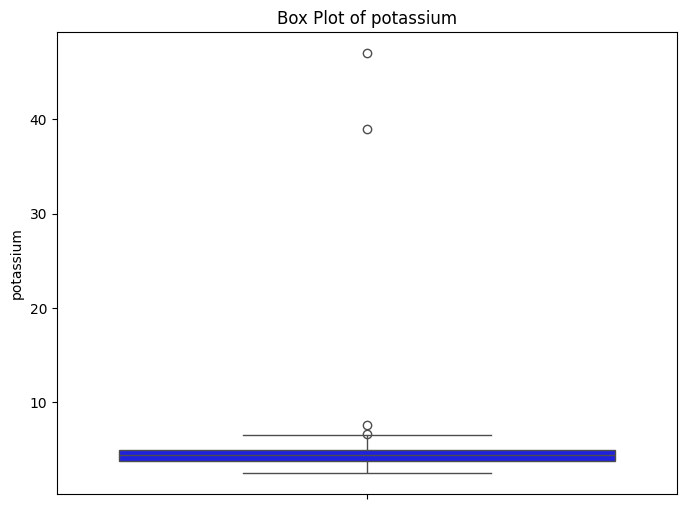

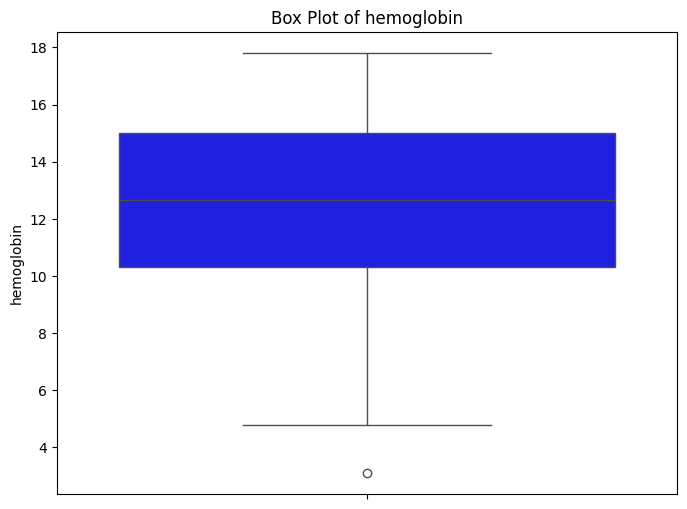

In [24]:
#Box plots visualize the distribution, central tendency, and spread of numerical data, as well as identify potential outliers.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, y=feature, color='blue')
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.show()


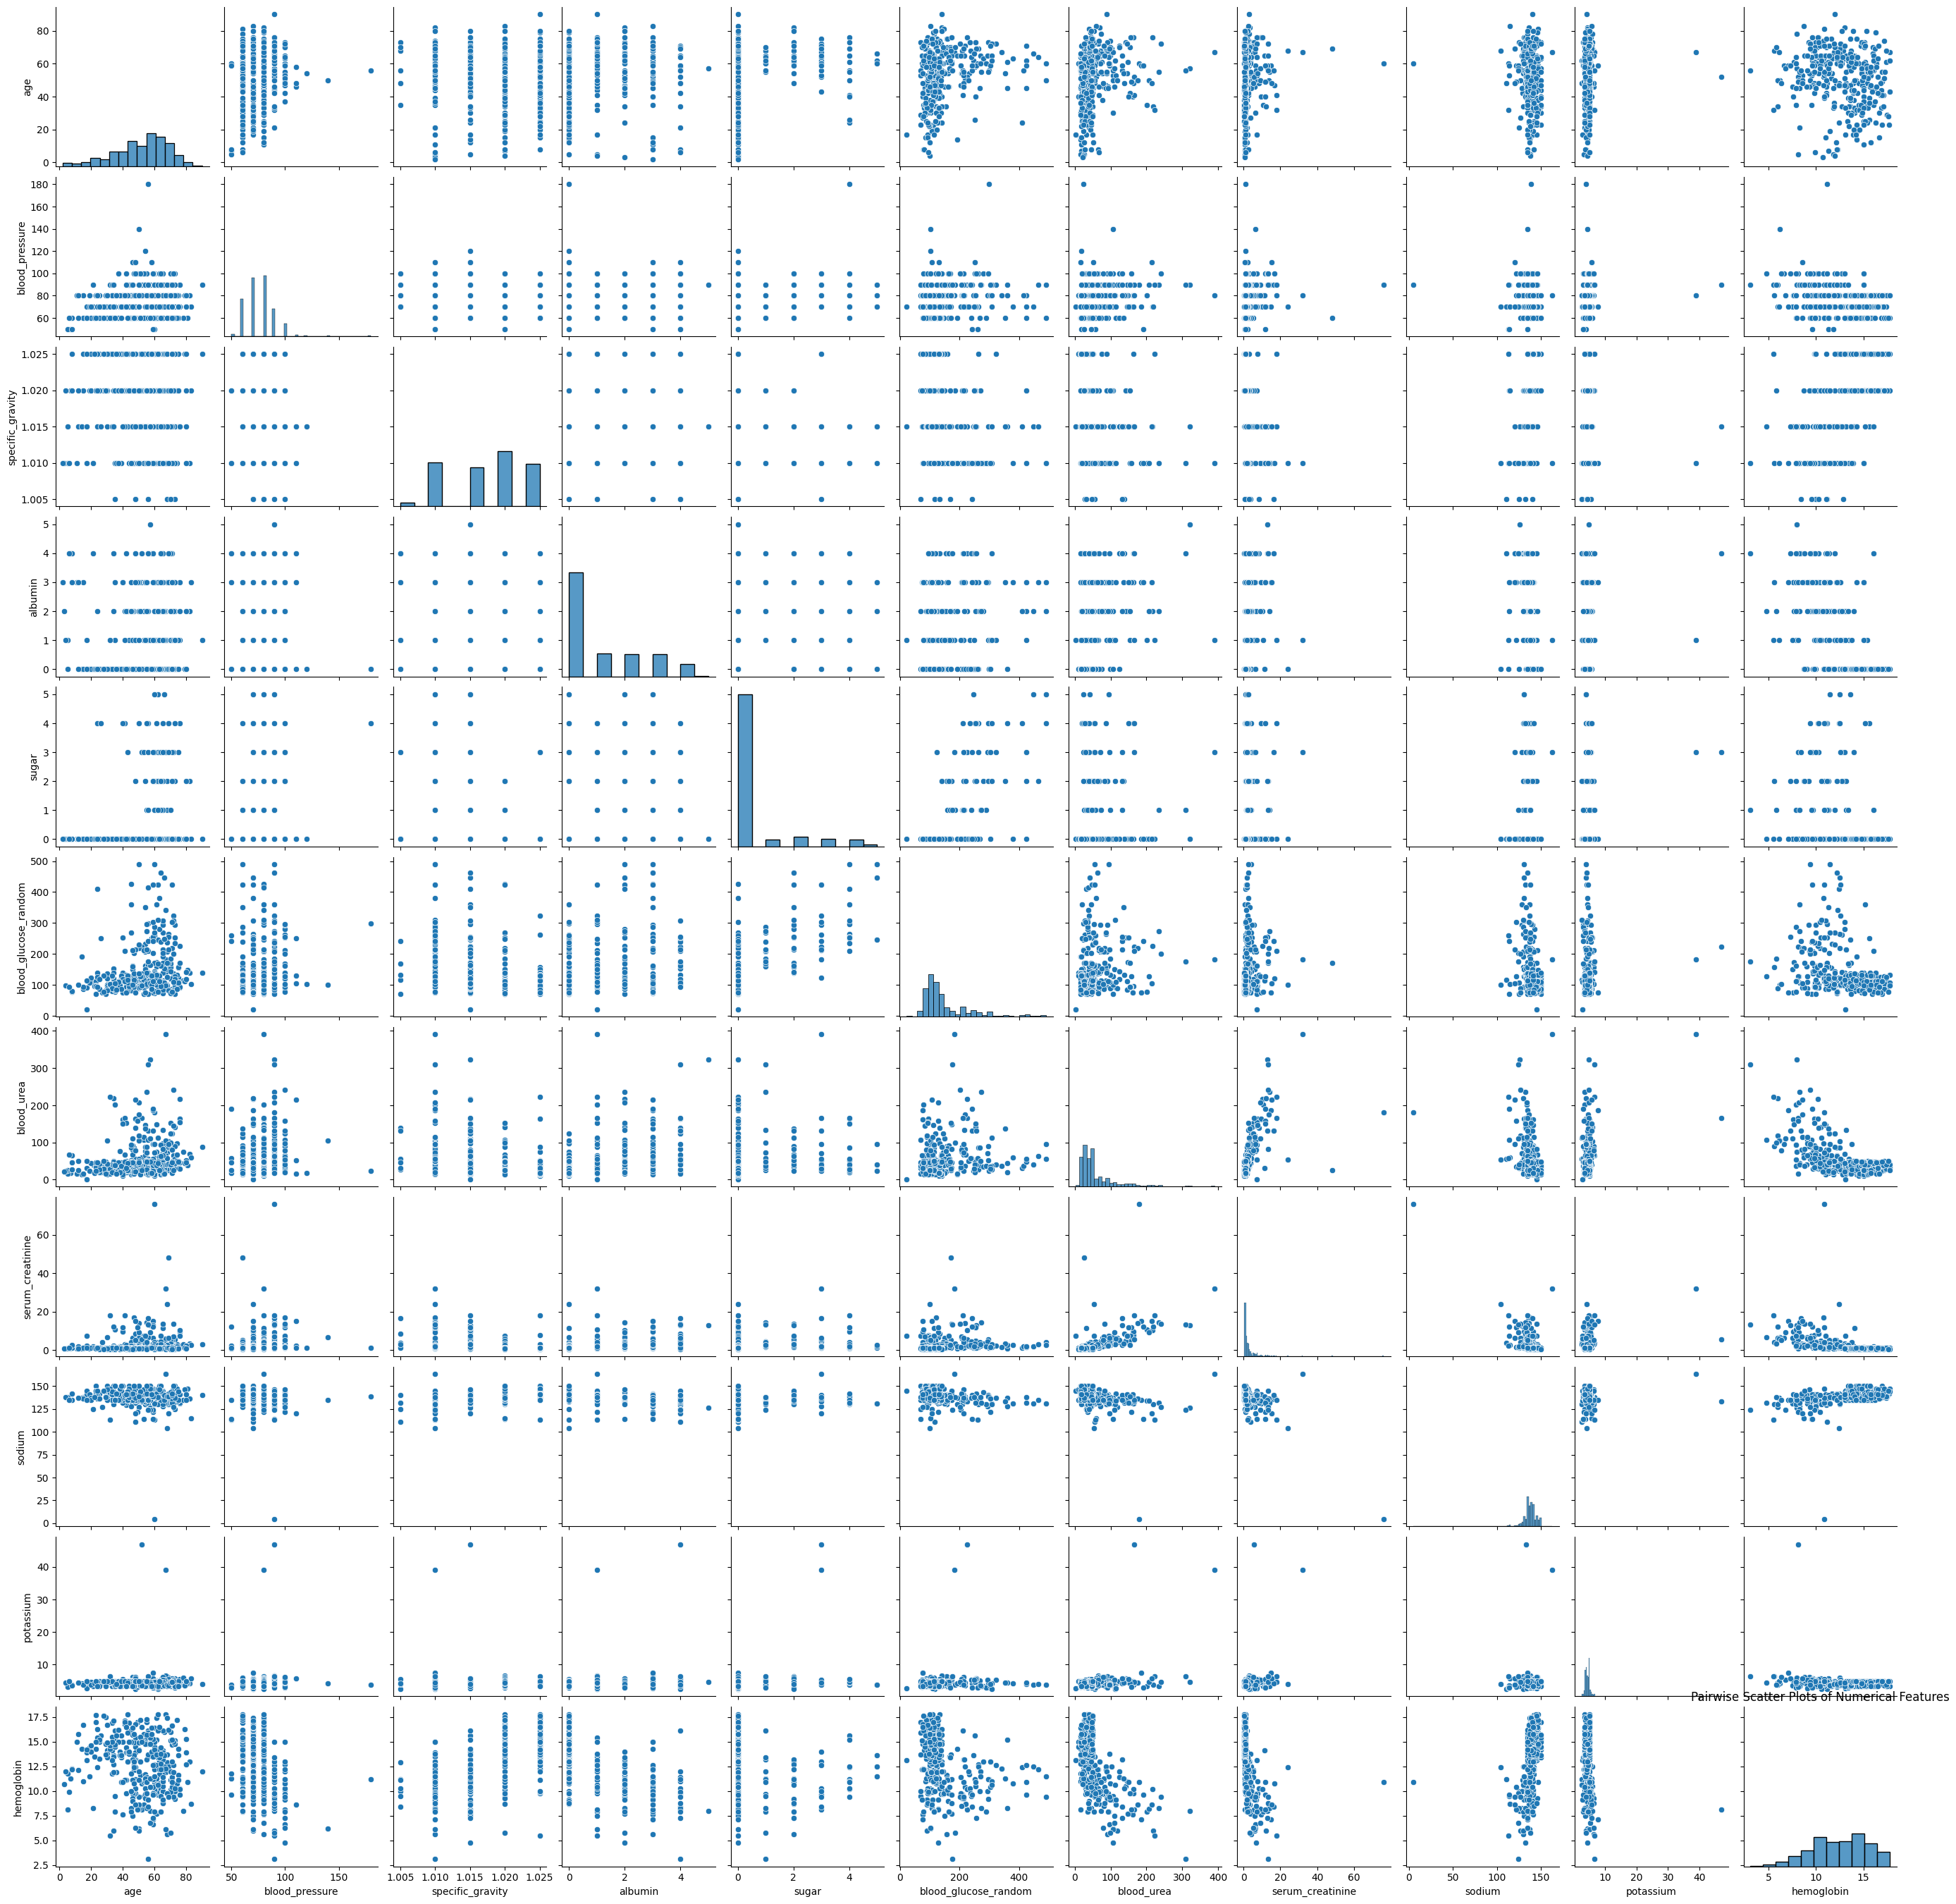

In [25]:
#This code generates pairwise scatter plots for numerical features, allowing visualization of the relationships between each pair of features.
#Scatter plots are useful for identifying potential correlations or patterns in the data.

sns.pairplot(train[numeric_features])
plt.title("Pairwise Scatter Plots of Numerical Features")
plt.show()


# **Visualizing Categorical features**

total categorical column : 10
['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']


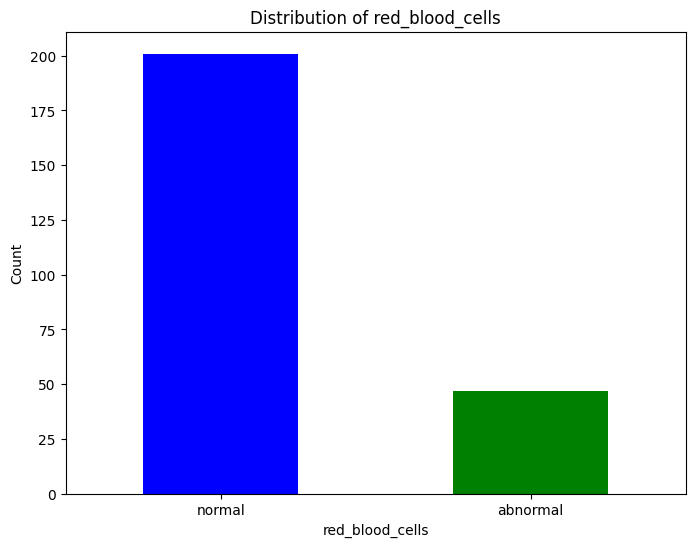

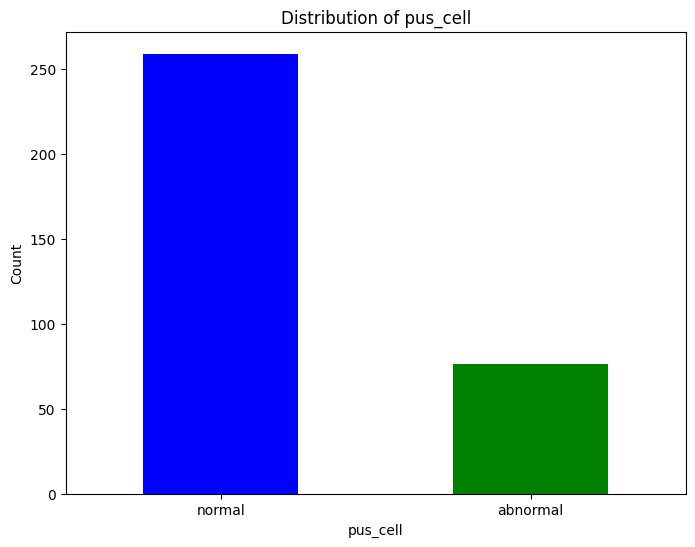

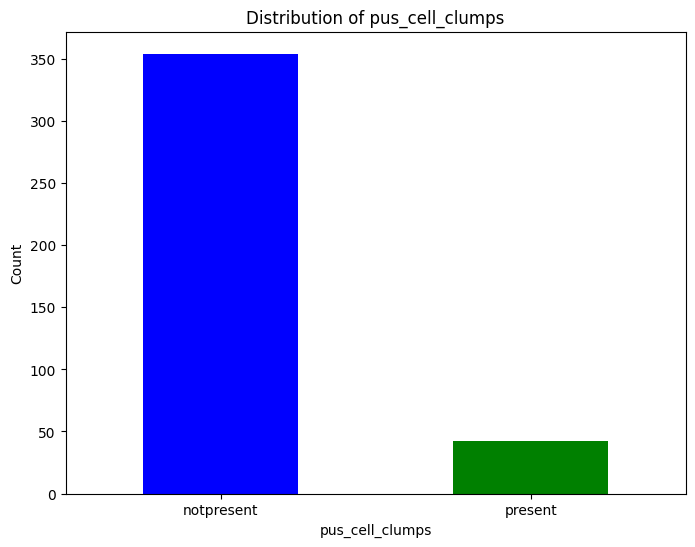

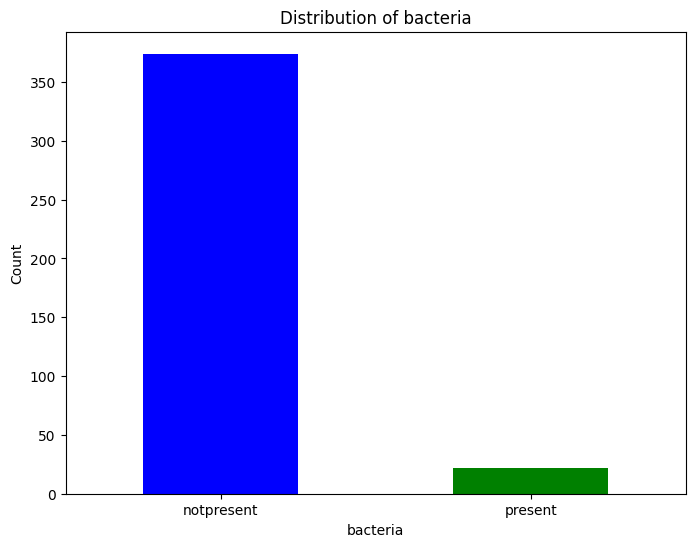

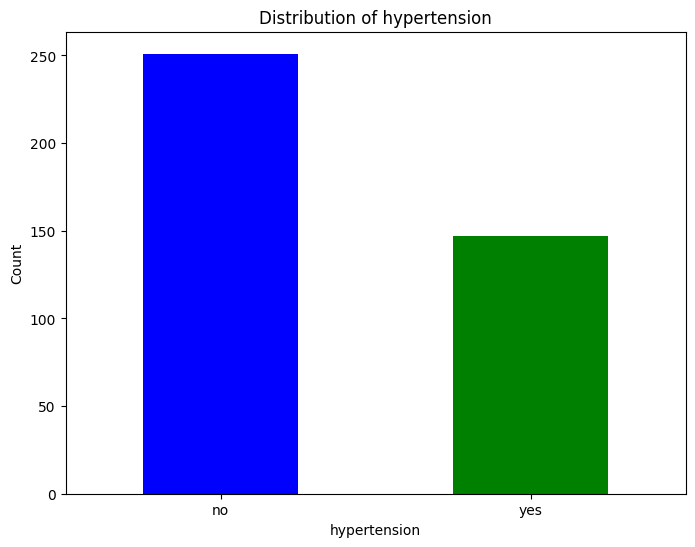

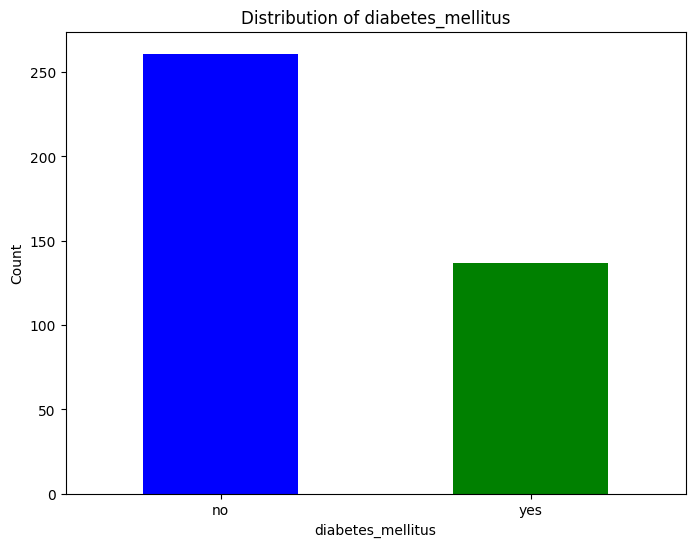

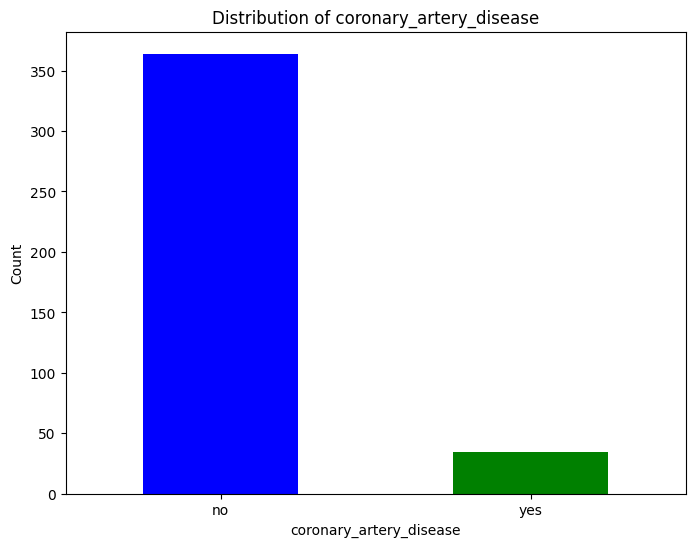

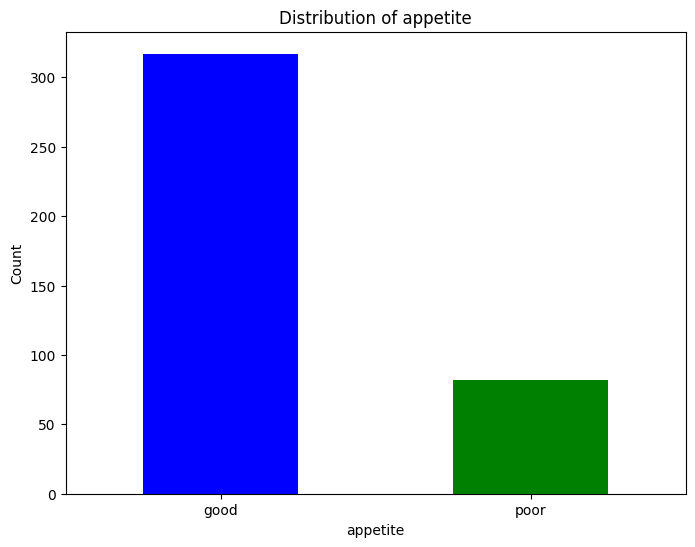

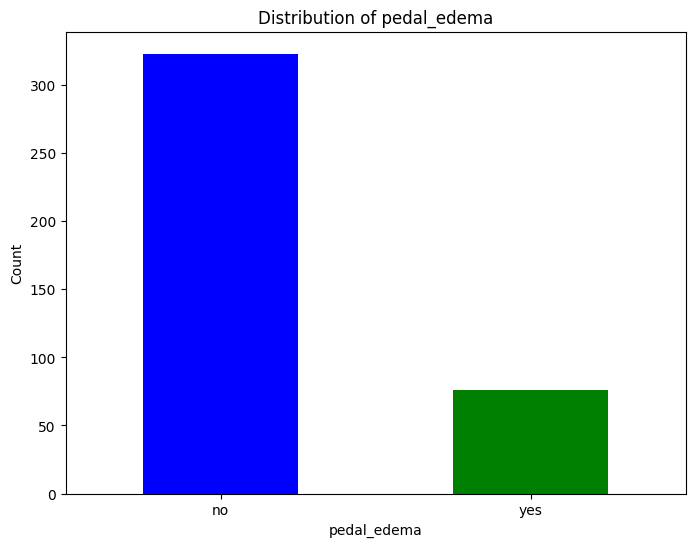

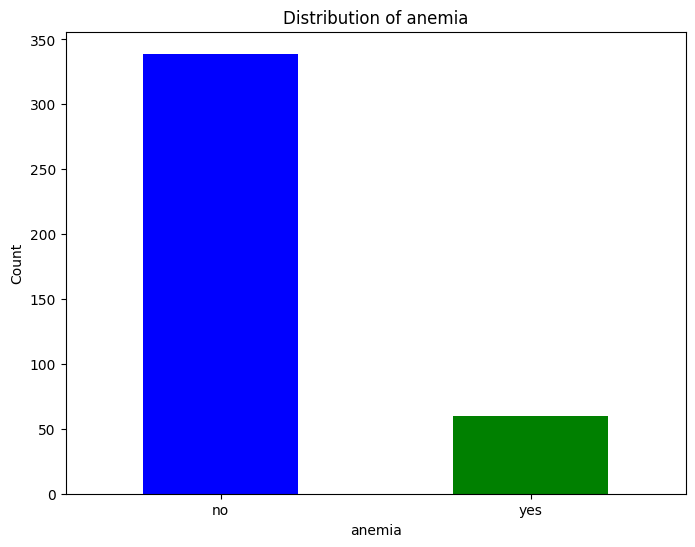

In [26]:
categorical_features = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
                        'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']
print('total categorical column :',len(categorical_features))
print(categorical_features)

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    train[feature].value_counts().plot(kind='bar', color=['blue', 'green'])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

**Observations:-** The below code provides insights into the distribution and prevalence of various categorical features among the patient records. It indicates the predominance of certain categories and helps in understanding the overall characteristics of the dataset.

For Example:-

* Red Blood Cells (red_blood_cells): There are 248 instances of 'normal' red blood cells, indicating that this is the predominant category.
There are 2 unique categories present in this feature.

In [27]:
##summary statistics on categorical features
train[categorical_features].describe(include='all').T

,count,unique,top,freq
red_blood_cells,248,2,normal,201
pus_cell,335,2,normal,259
pus_cell_clumps,396,2,notpresent,354
bacteria,396,2,notpresent,374
hypertension,398,2,no,251
diabetes_mellitus,398,2,no,261
coronary_artery_disease,398,2,no,364
appetite,399,2,good,317
pedal_edema,399,2,no,323
anemia,399,2,no,339
